In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

## SIR Model

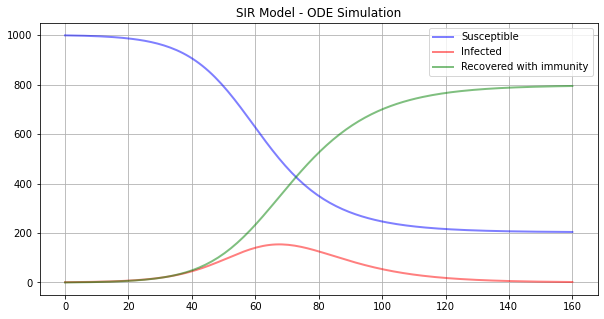

In [2]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

N = 1000
I0, R0 = 1, 0
S0 = N - I0 - R0
beta, gamma = 0.2, 1./10 
t = np.linspace(0, 160, 160)

y0 = S0, I0, R0

ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

fig, ax = plt.subplots(figsize = (10,5))
ax.set_title(f'SIR Model - ODE Simulation')
ax.plot(t, S, 'b-', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r-', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g-', alpha=0.5, lw=2, label='Recovered with immunity')
ax.legend()
ax.grid()
plt.show()

## SEIAR Model

In [3]:
N = 1000

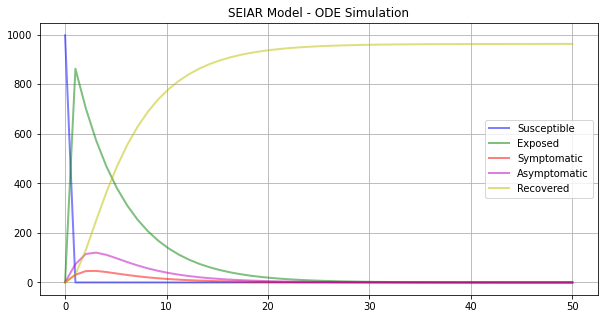

In [4]:
# set initial condition
E, I, A, R = 1, 1, 1, 0
S = N - E - I - A - R

beta_IH, beta_AH = 0.5, 0.45 # transmission rate 
gamma = 0.2 # incubation rate
theta = 0.3 # proportion showing symptom
lam = 0.7 # infection period (1/lambda)
delta = 0.1 # death rate per day

t = np.linspace(0, 50, 50)

# define ODE system
def deriv(y, t, beta_IH, beta_AH, gamma, theta, lam, delta):

    S, E, I, A, R = y

    dSdt = -1 * S * (beta_IH * (I) + beta_AH * (A))
    dEdt = (S * (beta_IH * (I) + beta_AH * (A))) - gamma * E
    dIdt = (theta * gamma * E) - (lam * I) - (delta * I)
    dAdt = ((1 - theta) * gamma * E) - (lam * A)
    dRdt = lam * (I + A)

    return dSdt, dEdt, dIdt, dAdt, dRdt

# combine initial condition
y0 = S, E, I, A, R

# solve ODE
ret = odeint(deriv, y0, t, args=(beta_IH, beta_AH, gamma, theta, lam, delta))
S, E, I, A, R = ret.T

# plot ODE
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title(f'SEIAR Model - ODE Simulation')
ax.plot(t, S, 'b-', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E, 'g-', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I, 'r-', alpha=0.5, lw=2, label='Symptomatic')
ax.plot(t, A, 'm-', alpha=0.5, lw=2, label='Asymptomatic')
ax.plot(t, R, 'y-', alpha=0.5, lw=2, label='Recovered')
ax.legend()
ax.grid()
plt.show()

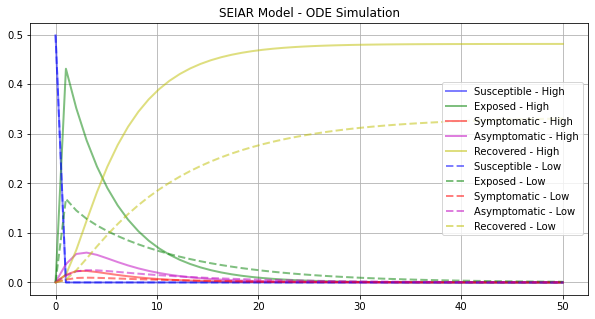

In [15]:
# set initial condition
H = 1000
E_High, I_High, A_High, R_High = 1, 1, 1, 0
S_High = H - E_High - I_High - A_High - R_High

L = 1000
E_Low, I_Low, A_Low, R_Low = 1, 1, 1, 0
S_Low = L - E_Low - I_Low - A_Low - R_Low

N = H + L

beta_IH, beta_AH = 0.5, 0.45 # transmission rate 
gamma = 0.2 # incubation rate
theta = 0.3 # proportion showing symptom
lam = 0.7 # infection period (1/lambda)
delta = 0.1 # death rate per day

t = np.linspace(0, 50, 50)

# define ODE system
def deriv_High_and_Low(y, t, beta_IH, beta_AH, gamma, theta, lam, delta):


    # Do we have different parameter for High and Low risk group?

    S_High, S_Low, E_High, E_Low, I_High, I_Low, A_High, A_Low, R_High, R_Low = y

    dS_High = -1 * S_High * (beta_IH * (I_High) + beta_AH * (A_High))
    dS_Low = -1 * S_Low * (beta_IH * (I_Low) + beta_AH * (A_Low))

    dE_High = (S_High * (beta_IH * (I_High) + beta_AH * (A_High))) - gamma * E_High
    dE_Low = (S_Low * beta_IH * (I_Low) + beta_AH * (A_Low)) - gamma * E_Low

    dI_High = (theta * gamma * E_High) - (lam * I_High) - (delta * I_High)
    dI_Low = (theta * gamma * E_Low) - (lam * I_Low) - (delta * I_Low)

    dA_High = ((1 - theta) * gamma * E_High) - (lam * A_High)
    dA_Low = ((1 - theta) * gamma * E_Low) - (lam * A_Low)

    dR_High = lam * (I_High + A_High)
    dR_Low = lam * (I_Low + A_Low)

    return dS_High, dS_Low, dE_High, dE_Low, dI_High, dI_Low, dA_High, dA_Low, dR_High, dR_Low

# combine initial condition
y0 = S_High, S_Low, E_High, E_Low, I_High, I_Low, A_High, A_Low, R_High, R_Low

# solve ODE
ret = odeint(deriv_High_and_Low, y0, t, args=(beta_IH, beta_AH, gamma, theta, lam, delta))
S_High, S_Low, E_High, E_Low, I_High, I_Low, A_High, A_Low, R_High, R_Low = ret.T

# plot ODE
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title('SEIAR Model - ODE Simulation')
ax.plot(t, S_High / N, 'b-', alpha=0.5, lw=2, label='Susceptible - High')
ax.plot(t, E_High / N, 'g-', alpha=0.5, lw=2, label='Exposed - High')
ax.plot(t, I_High / N, 'r-', alpha=0.5, lw=2, label='Symptomatic - High')
ax.plot(t, A_High / N, 'm-', alpha=0.5, lw=2, label='Asymptomatic - High')
ax.plot(t, R_High / N, 'y-', alpha=0.5, lw=2, label='Recovered - High')
ax.plot(t, S_Low / N, 'b--', alpha=0.5, lw=2, label='Susceptible - Low')
ax.plot(t, E_Low / N, 'g--', alpha=0.5, lw=2, label='Exposed - Low')
ax.plot(t, I_Low / N, 'r--', alpha=0.5, lw=2, label='Symptomatic - Low')
ax.plot(t, A_Low / N, 'm--', alpha=0.5, lw=2, label='Asymptomatic - Low')
ax.plot(t, R_Low / N, 'y--', alpha=0.5, lw=2, label='Recovered - Low')
ax.legend()
ax.grid()
plt.show()